<a href="https://colab.research.google.com/github/Scrollamos/histData_analysis/blob/main/TensorFlow_100_to_hero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf


In [13]:
X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer2'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='Model_one')

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(X_train, y_train, epochs=10, verbose=0)

In [14]:
model.summary()

Model: "Model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 input_layer2 (Dense)        (None, 1)                 11        
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


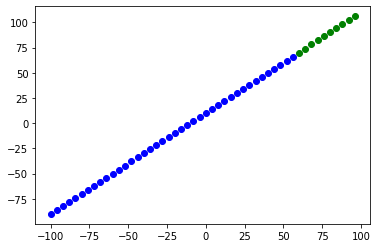

In [15]:
#Visualize model
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='b')
plt.scatter(X_test, y_test, color='g')

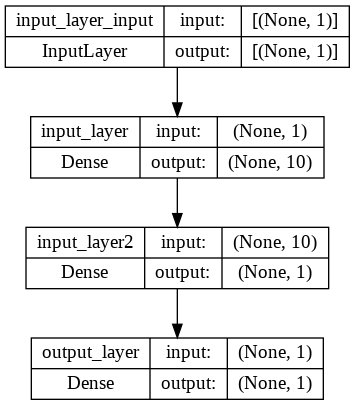

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [20]:
###**Visualize our model predictions**
#To visualize predictions, it's a good idea to plot them against the ground truth labels.

#Often you'll see this in the form of 'y_test' or 'y_true' versus y_pred (ground truth versus your model predictions)
#Make some predicitons
y_pred = model.predict(X_test)
y_pred

NameError: ignored

In [18]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [26]:
#lets create a plotting functions
import matplotlib.pyplot as plt
y_pred = 0
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='training data')
  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='test data')
  #plot models predictions in red
  plt.scatter(test_data, predictions, c='r', label='predictions')
  #show the legend
  plt.legend();
  


In [ ]:
#Evaluating our model's predictions with regression evaluation metrics

Depending on the problem youre working on, there will be different evasluation metrics to evaluate your models performance.
Since were working on a regression, the two main metrics:

*MAE - mean absolute error - A GREAT METRIC FOR ANY REGRESSION PROBLEM.
*MSE - mean square error, "square the average errors" - WHEN LARGER ERRORS ARE MORE SIGNIFICANT THAN SMALLER ERRORS.
*Huber - COMBINATION OF MSE and MAE. Less sensitive to outliers than MSE

In [28]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 43ms/step - loss: 33.5931 - mae: 33.5931


[33.59312057495117, 33.59312057495117]

In [29]:
track_sum = 0
for x in range(len(y_pred)):
  track_sum += y_test[x]-y_pred[x]

MAE = track_sum/len(y_pred)
print(MAE)

tf.Tensor([34.1], shape=(1,), dtype=float64)


In [35]:
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([46.108734, 43.327484, 40.546238, 37.764988, 34.983738, 32.2025  ,
       29.42125 , 26.64    , 23.858757, 21.077507], dtype=float32)>

In [37]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=33.59312>

In [18]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

NameError: ignored

In [35]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
#Running experiments to improve our model

1. get more data - get more examples
2. make your model larger (using a more complex model) - more layers, more hidden unites
3. train for longer - give your model more of a chance to find patterns in the data

Lets do 3 modelling experiments:
1. Model 1 - same as the original model, 1 layer, trained 100 epochs.
2. model 2 - 2 layers, trained for 100 epochs
3. model 3 - 2 layers, trained for 500 epochs

In [ ]:
#import stuff
import tensorflow as tf
#from tensorflow.keras import layers
#inputs = layers.Input(shape(1,), dtype='string') #inputs are 1-dimensional strings
#x = text_vectorizer(inputs) #turn the input text into numbers
#x = embedding(x #create an embedding of the numerized numbers)
#x = layers.GlobalAveragePooling1D()(x)

X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

#set random seed
tf.random.set_seed(42)

#1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)

In [45]:
#lets create a plotting functions
import matplotlib.pyplot as plt
y_pred = 0
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='training data')
  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='test data')
  #plot models predictions in red
  plt.scatter(test_data, predictions, c='r', label='predictions')
  #show the legend
  plt.legend();
  


In [33]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [37]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
#import stuff
import tensorflow as tf
#from tensorflow.keras import layers
#inputs = layers.Input(shape(1,), dtype='string') #inputs are 1-dimensional strings
#x = text_vectorizer(inputs) #turn the input text into numbers
#x = embedding(x #create an embedding of the numerized numbers)
#x = layers.GlobalAveragePooling1D()(x)

X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

#set random seed
tf.random.set_seed(42)

#1. create model 2 layers, 100 epochs
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

#3. fit model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [50]:
#Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

1/1 [==============================] - 0s 49ms/step


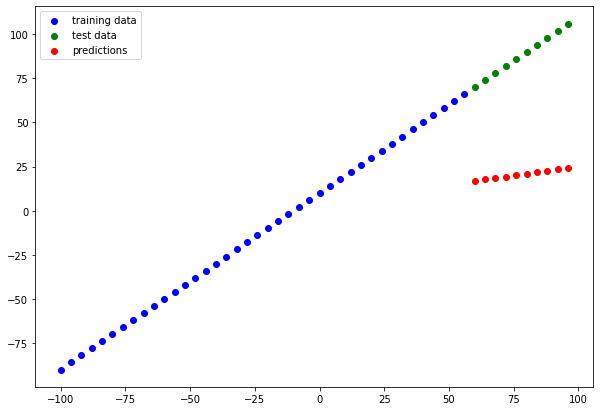

In [55]:
#import stuff
import tensorflow as tf
#from tensorflow.keras import layers
#inputs = layers.Input(shape(1,), dtype='string') #inputs are 1-dimensional strings
#x = text_vectorizer(inputs) #turn the input text into numbers
#x = embedding(x #create an embedding of the numerized numbers)
#x = layers.GlobalAveragePooling1D()(x)

X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

#set random seed
tf.random.set_seed(42)


#Lets build model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(19),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

#Make plot predictions of model_3 using the function we previously defined
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
#Results were shit because we ran it for way too long.